In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/divar_dataset/divar_posts_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN


In [ ]:
len(df['price'].unique())

3273

In [ ]:
df.sort_values(by='price')

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
441977,441977,True,NaN,businesses,batch,NaN,Isfahan,Saturday 11AM,روزی سی تن تحویل داده میشود,44441316018506,0,NaN,mobile,-1,ضایعات ویژه اهن,NaN,NaN
595014,595014,False,NaN,leisure-hobbies,animals,fish,Mashhad,Tuesday 10AM,فروش میگو ردچری به قیمت عمده,14673959213163,1,NaN,mobile,-1,میگو ردچری,NaN,NaN
136935,136935,False,پراید هاچ‌بک::Pride,vehicles,cars,light,Shiraz,Friday 01AM,سفید تمام فابریک بدون رنگ و کوچکترین خط و خش ب...,45303492722701,4,168000.0,mobile,-1,پژو 206تیپ 2خانگی,NaN,1388
136936,136936,False,NaN,for-the-home,furniture-and-home-decore,tv-and-stereo-furniture,Tehran,Friday 02AM,توافقی زیباترازعکس,856700054128,1,NaN,mobile,-1,به خریدار واقعی تخفیفم میدم,NaN,NaN
790897,790897,False,پراید صندوق‌دار::Pride,vehicles,cars,light,Ahvaz,Saturday 01PM,پراید131دوگانه فابریک سفیدse بدون رنگ قیمت گ...,60333918287960,0,42000.0,mobile,-1,پراید131دوگانه هدرولیک,NaN,1394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517618,517618,False,بنز::Mercedes-Benz,vehicles,cars,light,Tehran,Friday 03PM,سفیدرنگ وصفرکیلومتروبیمه تااخرسال وبدون مشابه ...,31151597775597,3,0.0,web,380000000,مرسدس بنزc300,NaN,1390
422875,422875,False,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Sunday 04AM,2015 بدون خط و خش,57401183024755,2,45000.0,mobile,380000000,528 فول 4کلید,NaN,1394
504827,504827,False,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Monday 06PM,فول اپشن vip بدون رنگ در حد,25306240691155,0,130000.0,mobile,390000000,bmw x6 2010,NaN,1390
945472,945472,True,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Thursday 02PM,بدون خط وخش,13465617520354,3,18000.0,mobile,398000000,Bmw x4 2016,NaN,1395


In [ ]:
df.drop(df[df['price'] < 1000].index, inplace=True)
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
554278,554278,False,NaN,personal,baby-and-toys,childrens-furniture,Mashhad,Saturday 04PM,انواع مدلهای مختلف,8548535442152,3,NaN,mobile,1000,شاسی کودک,NaN,NaN
921305,921305,False,NaN,businesses,equipments-and-machinery,shop-and-cash,Tehran,Tuesday 03PM,برای لباس زیر زنانه در دو نوع,11606683700975,2,NaN,mobile,1000,چوب لباسی,NaN,NaN
314061,314061,True,NaN,leisure-hobbies,animals,farm-animals,Karaj,Monday 06PM,قابل جوجه کشی.,59633549175008,0,NaN,web,1000,تخم مرغ نطفه دار,NaN,NaN
760781,760781,False,NaN,personal,clothing-and-shoes,clothing,Mashhad,Monday 07PM,با سلام انواع لباس مجلسی مانتو بالتو کفش جکمه ...,19788044704898,1,NaN,web,1000,انواع لباس,women,NaN
539471,539471,False,NaN,electronic-devices,game-consoles-and-video-games,NaN,Shiraz,Monday 11AM,(فروش گیم )بازی فوتبال امریکایی کامپیوتر 1000ت...,16331746205948,1,NaN,web,1000,بازی فوتبال امریکایی کامپیوتر,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517618,517618,False,بنز::Mercedes-Benz,vehicles,cars,light,Tehran,Friday 03PM,سفیدرنگ وصفرکیلومتروبیمه تااخرسال وبدون مشابه ...,31151597775597,3,0.0,web,380000000,مرسدس بنزc300,NaN,1390
422875,422875,False,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Sunday 04AM,2015 بدون خط و خش,57401183024755,2,45000.0,mobile,380000000,528 فول 4کلید,NaN,1394
504827,504827,False,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Monday 06PM,فول اپشن vip بدون رنگ در حد,25306240691155,0,130000.0,mobile,390000000,bmw x6 2010,NaN,1390
945472,945472,True,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Thursday 02PM,بدون خط وخش,13465617520354,3,18000.0,mobile,398000000,Bmw x4 2016,NaN,1395


In [ ]:
df = df.sort_values(by='price')

In [ ]:
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
554278,554278,False,NaN,personal,baby-and-toys,childrens-furniture,Mashhad,Saturday 04PM,انواع مدلهای مختلف,8548535442152,3,NaN,mobile,1000,شاسی کودک,NaN,NaN
667122,667122,False,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Monday 03PM,کیف های نو انواع گوشی جک دار و دستی می باشد و ...,41757714316816,1,NaN,mobile,1000,کیف دستی جکدار موبایل نو,NaN,NaN
63402,63402,False,NaN,for-the-home,utility,NaN,Tehran,Sunday 11AM,هرعدد ١٠٠٠ تومان مناسب اویزان کردن لباسها در ت...,31441827106382,2,NaN,mobile,1000,رخت اویز و اویز شلوار,NaN,NaN
324038,324038,False,NaN,businesses,equipments-and-machinery,industrial,Mashhad,Sunday 02PM,فروش دستگاه نوار زن ترک و کنر زن اسپانیای,55011263789889,2,NaN,mobile,1000,دستگاه نوار زن وكنر زن,NaN,NaN
272678,272678,False,NaN,leisure-hobbies,animals,fish,Mashhad,Tuesday 05PM,ماده گپی تازه بالغ جهت تکثیر,17466894857297,0,NaN,web,1000,گپی جهت تکثیر,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517618,517618,False,بنز::Mercedes-Benz,vehicles,cars,light,Tehran,Friday 03PM,سفیدرنگ وصفرکیلومتروبیمه تااخرسال وبدون مشابه ...,31151597775597,3,0.0,web,380000000,مرسدس بنزc300,NaN,1390
422875,422875,False,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Sunday 04AM,2015 بدون خط و خش,57401183024755,2,45000.0,mobile,380000000,528 فول 4کلید,NaN,1394
504827,504827,False,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Monday 06PM,فول اپشن vip بدون رنگ در حد,25306240691155,0,130000.0,mobile,390000000,bmw x6 2010,NaN,1390
945472,945472,True,بی‌ام‌و::BMW,vehicles,cars,light,Tehran,Thursday 02PM,بدون خط وخش,13465617520354,3,18000.0,mobile,398000000,Bmw x4 2016,NaN,1395


In [ ]:
len(df['price'])

783169

In [ ]:
df.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
554278,554278,False,NaN,personal,baby-and-toys,childrens-furniture,Mashhad,Saturday 04PM,انواع مدلهای مختلف,8548535442152,3,NaN,mobile,1000,شاسی کودک,NaN,NaN
667122,667122,False,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Monday 03PM,کیف های نو انواع گوشی جک دار و دستی می باشد و ...,41757714316816,1,NaN,mobile,1000,کیف دستی جکدار موبایل نو,NaN,NaN
63402,63402,False,NaN,for-the-home,utility,NaN,Tehran,Sunday 11AM,هرعدد ١٠٠٠ تومان مناسب اویزان کردن لباسها در ت...,31441827106382,2,NaN,mobile,1000,رخت اویز و اویز شلوار,NaN,NaN
324038,324038,False,NaN,businesses,equipments-and-machinery,industrial,Mashhad,Sunday 02PM,فروش دستگاه نوار زن ترک و کنر زن اسپانیای,55011263789889,2,NaN,mobile,1000,دستگاه نوار زن وكنر زن,NaN,NaN
272678,272678,False,NaN,leisure-hobbies,animals,fish,Mashhad,Tuesday 05PM,ماده گپی تازه بالغ جهت تکثیر,17466894857297,0,NaN,web,1000,گپی جهت تکثیر,NaN,NaN


In [ ]:
lst=[]
for price in df['price']:
  if price<100000:
    lst.append('verylow')
  if price>=100000 and price<1000000:
    lst.append('low')
  if price>=1000000 and price<50000000:
    lst.append('mid')
  if price>=50000000 and price<100000000:
    lst.append('high')
  if price>=100000000:
    lst.append('veryhigh')

len(lst)

783169

In [ ]:
lst[783162:783169]

['veryhigh',
 'veryhigh',
 'veryhigh',
 'veryhigh',
 'veryhigh',
 'veryhigh',
 'veryhigh']

In [ ]:
df['price_class']=lst
df.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year,price_class
554278,554278,False,NaN,personal,baby-and-toys,childrens-furniture,Mashhad,Saturday 04PM,انواع مدلهای مختلف,8548535442152,3,NaN,mobile,1000,شاسی کودک,NaN,NaN,verylow
667122,667122,False,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Monday 03PM,کیف های نو انواع گوشی جک دار و دستی می باشد و ...,41757714316816,1,NaN,mobile,1000,کیف دستی جکدار موبایل نو,NaN,NaN,verylow
63402,63402,False,NaN,for-the-home,utility,NaN,Tehran,Sunday 11AM,هرعدد ١٠٠٠ تومان مناسب اویزان کردن لباسها در ت...,31441827106382,2,NaN,mobile,1000,رخت اویز و اویز شلوار,NaN,NaN,verylow
324038,324038,False,NaN,businesses,equipments-and-machinery,industrial,Mashhad,Sunday 02PM,فروش دستگاه نوار زن ترک و کنر زن اسپانیای,55011263789889,2,NaN,mobile,1000,دستگاه نوار زن وكنر زن,NaN,NaN,verylow
272678,272678,False,NaN,leisure-hobbies,animals,fish,Mashhad,Tuesday 05PM,ماده گپی تازه بالغ جهت تکثیر,17466894857297,0,NaN,web,1000,گپی جهت تکثیر,NaN,NaN,verylow


In [ ]:
matrix=df[['cat3']]
matrix.head()

,cat3
554278,childrens-furniture
667122,mobile-tablet-accessories
63402,NaN
324038,industrial
272678,fish


In [ ]:
df = df.sort_index()
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year,price_class
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN,mid
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN,verylow
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN,low
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN,low
5,5,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 09PM,بسیارتمیزوسالم وچوب راش فقط به علت جابه جایی و...,48029048440635,4,NaN,mobile,1000000,مبل استیل,NaN,NaN,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,True,NaN,for-the-home,building-and-garden,stove-and-heating,Shiraz,Friday 07AM,دوعدد یکی یک متری و دیگری 1.4 متری موجود است\n...,16127180351093,1,NaN,web,180000,رادیاتور پنلی نو ترک,NaN,NaN,low
947631,947631,True,NaN,electronic-devices,audio-video,camera-camcoders,Tehran,Friday 02PM,دوربین هندی کم کنون مدل لگریا fs36\n\nعکاسی و ...,29805298491725,1,NaN,mobile,350000,دوربین هندی کم کنون,NaN,NaN,low
947632,947632,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Shiraz,Friday 04PM,پراید دوگانه کارخانه میباشد و کم کارکرد.روکش ....,55514317985619,3,43000.0,mobile,17400000,پراید دوگانه کارخانه مدل93,NaN,1393,mid
947633,947633,True,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Friday 05PM,مونو پد یانگ تد همراه با پایه و اینه عقبش\nواس...,65938921533442,1,NaN,mobile,40000,مونوپد یانگ تد خیلی تمیز و نو,NaN,NaN,verylow


In [ ]:
matrix=df[['cat3']]
matrix.head()

,cat3
0,sofa-armchair
1,antiques-and-art
3,sofa-armchair
4,personal-toys
5,sofa-armchair


In [ ]:
temp = pd.get_dummies(df['price_class'])
temp.head()

,high,low,mid,veryhigh,verylow
0,0,0,1,0,0
1,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
5,0,0,1,0,0


In [ ]:
temp['category'] = df['cat3']
temp.head()

,high,low,mid,veryhigh,verylow,category
0,0,0,1,0,0,sofa-armchair
1,0,0,0,0,1,antiques-and-art
3,0,1,0,0,0,sofa-armchair
4,0,1,0,0,0,personal-toys
5,0,0,1,0,0,sofa-armchair


In [ ]:
cols = list(temp.columns)
temp = temp[[cols[-1]] + cols[0:-1]]
temp.head()

,category,high,low,mid,veryhigh,verylow
0,sofa-armchair,0,0,1,0,0
1,antiques-and-art,0,0,0,0,1
3,sofa-armchair,0,1,0,0,0
4,personal-toys,0,1,0,0,0
5,sofa-armchair,0,0,1,0,0


In [ ]:
newdf = df.groupby(by=['cat3'], as_index=False).sum()
newdf.head()

,cat3,Unnamed: 0,archive_by_user,id,image_count,mileage,price
0,accessories,2178196072,2308,154241410029727904,7701,0.0,795105800
1,antiques-and-art,11856383878,13628,843915547039274240,44436,0.0,3038224416
2,ball-sports,299187102,256,21087555546014712,1144,0.0,206065400
3,barbershop-and-beautysalon,1008563458,1130,71269067899214104,3008,0.0,1138189131
4,bathroom-wc-sauna,463106673,689,33054465544517732,1562,0.0,122533303


In [ ]:
newdf = temp.groupby(by=['cat3'], as_index=False).sum()
newdf

In [ ]:
new1 = pd.concat([df, temp], axis = 1)
new1.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year,price_class,high,low,mid,veryhigh,verylow
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN,mid,0,0,1,0,0
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN,verylow,0,0,0,0,1
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN,low,0,1,0,0,0
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN,low,0,1,0,0,0
5,5,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 09PM,بسیارتمیزوسالم وچوب راش فقط به علت جابه جایی و...,48029048440635,4,NaN,mobile,1000000,مبل استیل,NaN,NaN,mid,0,0,1,0,0


In [ ]:
# new1 = new1.groupby(by=['cat3'], as_index=False).sum()
# new1

,cat3,Unnamed: 0,archive_by_user,id,image_count,mileage,price,high,low,mid,veryhigh,verylow
0,accessories,2178196072,2308,154241410029727904,7701,0.0,795105800,0.0,2597.0,4.0,0.0,2031.0
1,antiques-and-art,11856383878,13628,843915547039274240,44436,0.0,3038224416,0.0,9601.0,18.0,0.0,15390.0
2,ball-sports,299187102,256,21087555546014712,1144,0.0,206065400,0.0,366.0,45.0,0.0,208.0
3,barbershop-and-beautysalon,1008563458,1130,71269067899214104,3008,0.0,1138189131,0.0,1501.0,292.0,0.0,321.0
4,bathroom-wc-sauna,463106673,689,33054465544517732,1562,0.0,122533303,0.0,556.0,0.0,0.0,407.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,tv-projector,6517055891,7163,462082475504725696,20476,0.0,6031441607,0.0,9814.0,1945.0,0.0,2031.0
62,video-dvdplayer,334369001,416,23824067247257688,1347,0.0,73652500,0.0,315.0,0.0,0.0,414.0
63,washer-dryer,2197557320,2550,157984953992830048,7903,0.0,2541518415,0.0,3775.0,778.0,0.0,144.0
64,watches,2519685232,2818,179952755811715584,11225,0.0,1405853900,0.0,3764.0,177.0,0.0,1378.0


In [ ]:
new1 = new1.drop(new1.columns[[1, 2, 3, 4, 5, 6]], axis=1)
new1

,cat3,high,low,mid,veryhigh,verylow
0,accessories,0.0,2597.0,4.0,0.0,2031.0
1,antiques-and-art,0.0,9601.0,18.0,0.0,15390.0
2,ball-sports,0.0,366.0,45.0,0.0,208.0
3,barbershop-and-beautysalon,0.0,1501.0,292.0,0.0,321.0
4,bathroom-wc-sauna,0.0,556.0,0.0,0.0,407.0
...,...,...,...,...,...,...
61,tv-projector,0.0,9814.0,1945.0,0.0,2031.0
62,video-dvdplayer,0.0,315.0,0.0,0.0,414.0
63,washer-dryer,0.0,3775.0,778.0,0.0,144.0
64,watches,0.0,3764.0,177.0,0.0,1378.0


In [ ]:
norm = normalize(new1.iloc[:, 1:])


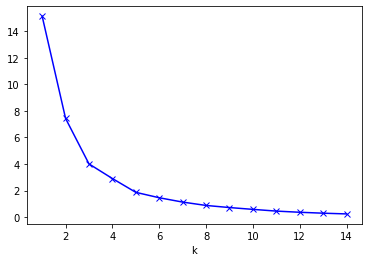

In [ ]:
abs_dist = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=50)
    km = km.fit(norm)
    abs_dist.append(km.inertia_)

plt.plot(K, abs_dist, 'bx-')
plt.xlabel('k')
plt.show()

**K = 3**

In [ ]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=150, n_init=50)
model.fit(norm)
labels=model.labels_
new1['cluster'] = labels

In [ ]:
new1.tail()

,cat3,high,low,mid,veryhigh,verylow,cluster
61,tv-projector,0.0,9814.0,1945.0,0.0,2031.0,1
62,video-dvdplayer,0.0,315.0,0.0,0.0,414.0,0
63,washer-dryer,0.0,3775.0,778.0,0.0,144.0,1
64,watches,0.0,3764.0,177.0,0.0,1378.0,1
65,winter-sports,0.0,719.0,236.0,0.0,64.0,1


In [ ]:
new1.sort_values(by='cluster')

,cat3,high,low,mid,veryhigh,verylow,cluster
0,accessories,0.0,2597.0,4.0,0.0,2031.0,0
39,mp3-player,0.0,418.0,0.0,0.0,358.0,0
41,parts-and-accessories,0.0,3299.0,0.0,0.0,5354.0,0
42,personal-toys,0.0,1730.0,0.0,0.0,2677.0,0
45,repair-tool,0.0,161.0,0.0,0.0,139.0,0
...,...,...,...,...,...,...,...
43,piano-keyboard,0.0,348.0,444.0,0.0,40.0,2
7,cafe-and-restaurant,0.0,1305.0,1010.0,0.0,205.0,2
33,light,5293.0,123.0,95237.0,2510.0,594.0,2
50,sofa-armchair,0.0,22458.0,18009.0,0.0,992.0,2


In [ ]:
new1[new1['cluster'] == 1]

,cat3,high,low,mid,veryhigh,verylow,cluster
2,ball-sports,0.0,366.0,45.0,0.0,208.0,1
3,barbershop-and-beautysalon,0.0,1501.0,292.0,0.0,321.0,1
5,beds-bedroom,0.0,9979.0,1773.0,0.0,2446.0,1
8,camera-camcoders,0.0,2920.0,832.0,0.0,615.0,1
10,carpets,0.0,12563.0,3530.0,0.0,3402.0,1
11,cat,0.0,269.0,23.0,0.0,13.0,1
12,child-car-seat,0.0,793.0,0.0,0.0,204.0,1
17,desktops,0.0,3193.0,604.0,0.0,186.0,1
19,drums-percussion,0.0,177.0,47.0,0.0,51.0,1
23,fridge-and-freezer,0.0,7145.0,2422.0,0.0,109.0,1
